In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

# Load dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Keep relevant columns and rename them
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

# Convert labels to binary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Data cleaning: remove punctuation, lowercase, remove stop words
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

data['clean_text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


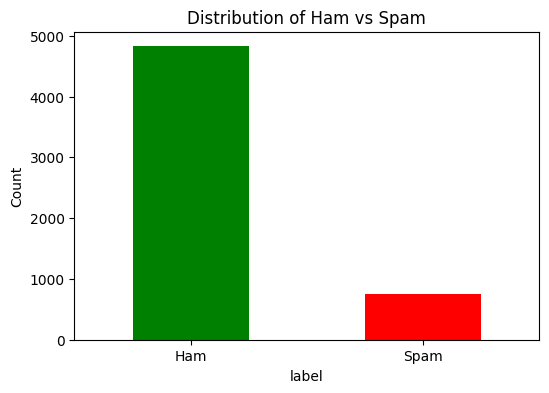

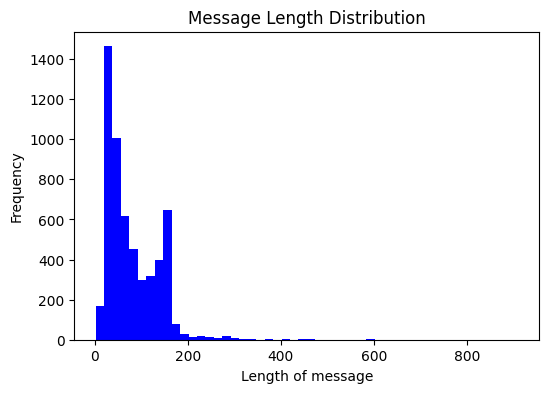

In [ ]:
import matplotlib.pyplot as plt

# Spam vs Ham distribution
plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Ham vs Spam')
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.ylabel('Count')
plt.show()

# Message length distribution
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(6, 4))
plt.hist(data['text_length'], bins=50, color='blue')
plt.title('Message Length Distribution')
plt.xlabel('Length of message')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the text using NLTK's word tokenizer
data['tokens'] = data['clean_text'].apply(word_tokenize)

# Initialize the Tokenizer from TensorFlow (limits to 5000 words)
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['clean_text'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(data['clean_text'])

# Pad sequences to ensure uniform input length (e.g., 100)
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')

# Convert labels and data into NumPy arrays
X = np.array(padded_sequences)
y = np.array(data['label'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Define the model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=100),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8409 - loss: 0.4636 - val_accuracy: 0.8655 - val_loss: 0.3745
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8672 - loss: 0.3696 - val_accuracy: 0.8655 - val_loss: 0.3712
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8738 - loss: 0.3542 - val_accuracy: 0.8655 - val_loss: 0.3748
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8670 - loss: 0.3620 - val_accuracy: 0.8655 - val_loss: 0.3545
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8615 - loss: 0.3518 - val_accuracy: 0.8646 - val_loss: 0.3250
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8684 - loss: 0.3011 - val_accuracy: 0.8682 - val_loss: 0.2694
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8808 - loss: 0.2436 - val_accuracy: 0.9318 - val_loss: 0.2044
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.1651 - val_accuracy: 0.

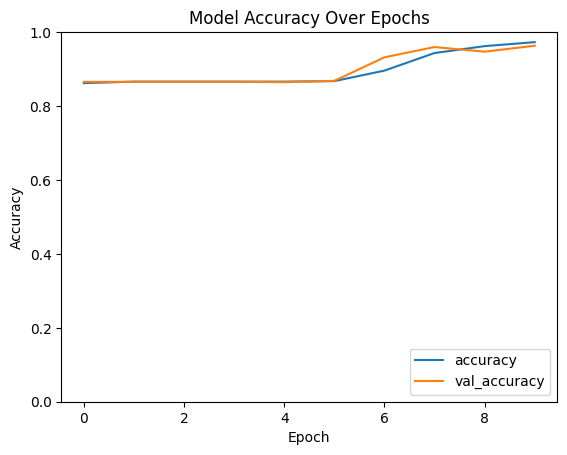

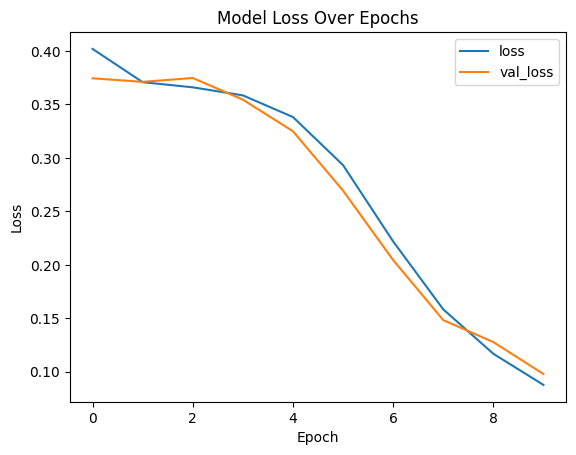

In [ ]:
# Plotting training history: accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy Over Epochs')
plt.show()

# Plotting training history: loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss Over Epochs')
plt.show()
